In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
import sys
sys.path.append('/data/ajay/clip/CLIP')

In [3]:
import clip_utils

# Modified RN50

In [4]:
encoder, preprocess = clip_utils.load_rn(jit=False)

In [5]:
clip_utils.clip_model_rn.module.clip_model.visual

ModifiedResNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, a

In [6]:
clip_utils.clip_model_rn.module.clip_model.dtype

torch.float16

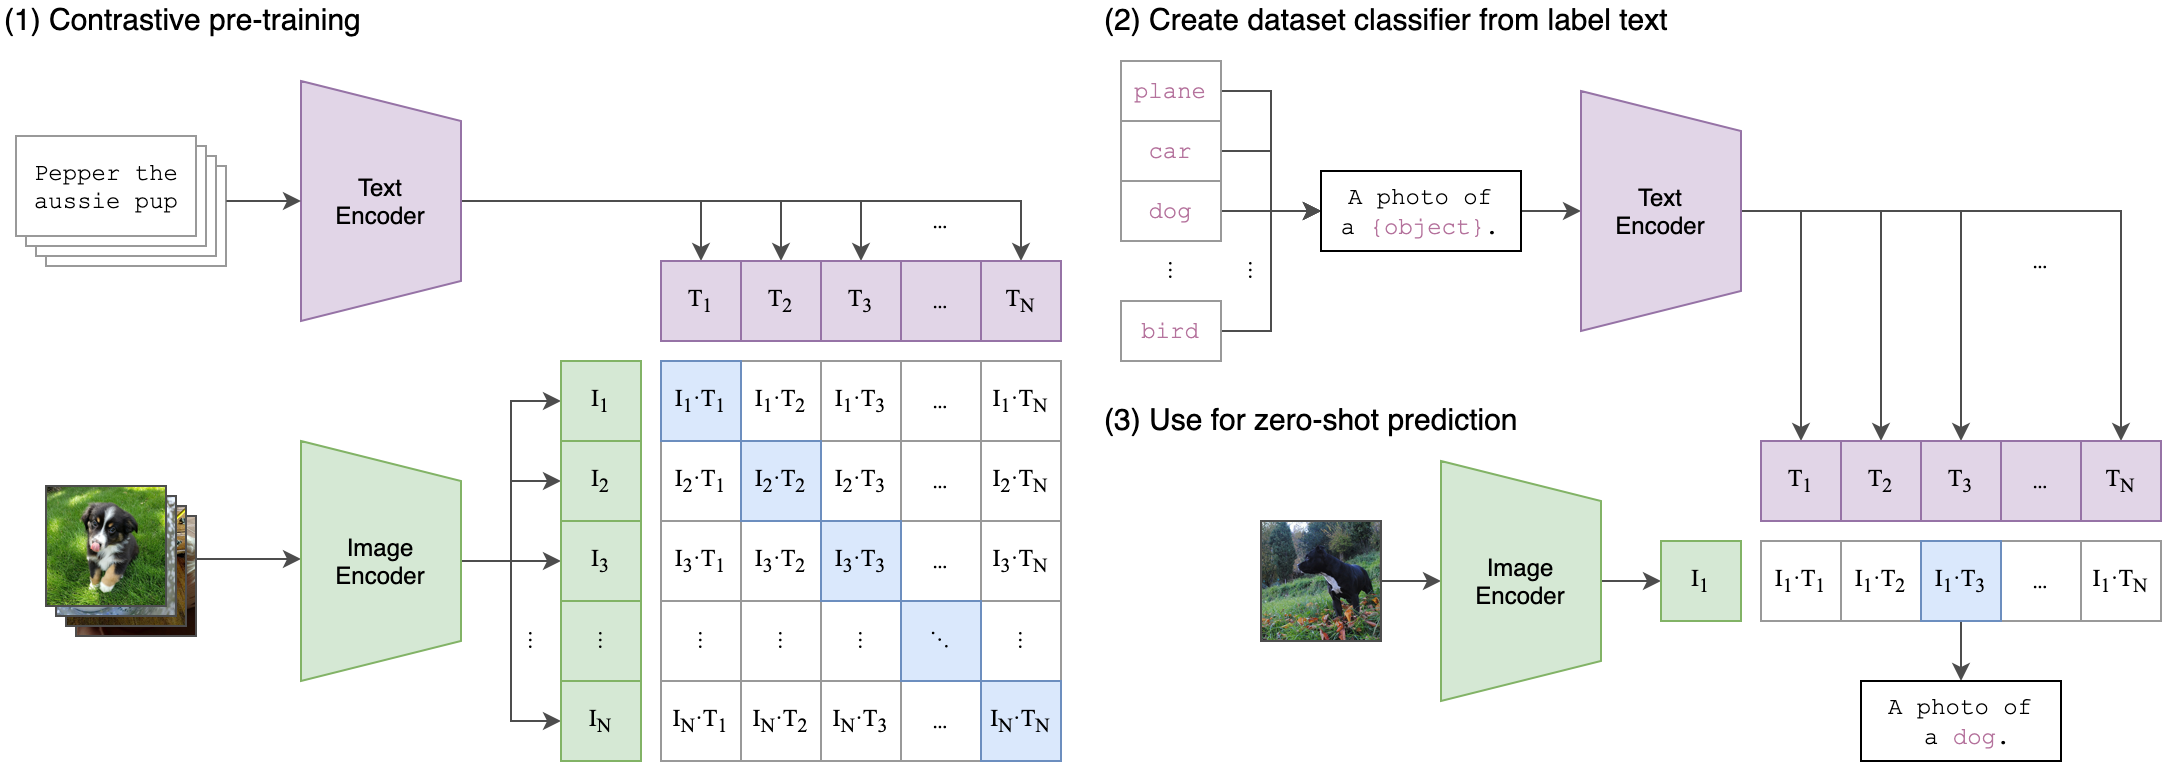

In [7]:
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
image = Image.open("/data/ajay/clip/CLIP/CLIP.png")
image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


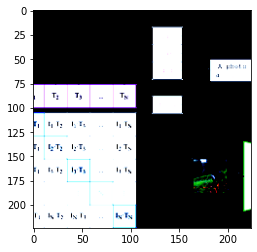

In [8]:
processed = preprocess(image)
plt.imshow(processed.permute(1, 2, 0))

In [9]:
processed.dtype

torch.float32

In [10]:
batch = processed.type(torch.float16).unsqueeze(0).to(device)
z = clip_utils.clip_model_rn.module.clip_model.visual(batch)

rn initial torch.Size([1, 3, 224, 224]) torch.float16
rn after step torch.Size([1, 64, 56, 56]) torch.float16
rn after layer1 torch.Size([1, 256, 56, 56]) torch.float16
rn after layer2 torch.Size([1, 512, 28, 28]) torch.float16
rn after layer3 torch.Size([1, 1024, 14, 14]) torch.float16
rn after layer4 torch.Size([1, 2048, 7, 7]) torch.float16
rn after attnpool torch.Size([1, 1024]) torch.float16


In [11]:
z.shape

torch.Size([1, 1024])

# ViT B/32

In [4]:
encoder, preprocess = clip_utils.load_vit();

In [5]:
clip_utils.clip_model_vit.module.clip_model.visual

VisualTransformer(
  (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
  (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (transformer): Transformer(
    (resblocks): Sequential(
      (0): ResidualAttentionBlock(
        (attn): MultiheadAttention(
          (out_proj): _LinearWithBias(in_features=768, out_features=768, bias=True)
        )
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Sequential(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (gelu): QuickGELU()
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (1): ResidualAttentionBlock(
        (attn): MultiheadAttention(
          (out_proj): _LinearWithBias(in_features=768, out_features=768, bias=True)
        )
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Seq

In [6]:
clip_utils.clip_model_vit.module.clip_model.dtype

torch.float16

In [7]:
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
image = Image.open("/data/ajay/clip/CLIP/CLIP.png")
image

In [9]:
processed = preprocess(image)
plt.imshow(processed.permute(1, 2, 0))

In [11]:
processed.dtype

torch.float32

In [12]:
batch = processed.type(torch.float16).unsqueeze(0).to(device)
z = clip_utils.clip_model_vit.module.clip_model.visual(batch)

vit initial torch.Size([1, 3, 224, 224])
vit after conv1 torch.Size([1, 768, 7, 7])
vit before embedding torch.Size([1, 49, 768])
vit after embedding torch.Size([1, 50, 768])
vit after ln_pre torch.Size([1, 50, 768])
vit before transformer torch.Size([50, 1, 768])
vit after transformer torch.Size([50, 1, 768])
vit after permute torch.Size([1, 50, 768])


In [13]:
z.shape

torch.Size([1, 512])

In [14]:
features = clip_utils.clip_model_vit.module.clip_model.visual.featurize(batch)

vit initial torch.Size([1, 3, 224, 224])
vit after conv1 torch.Size([1, 768, 7, 7])
vit before embedding torch.Size([1, 49, 768])
vit after embedding torch.Size([1, 50, 768])
vit after ln_pre torch.Size([1, 50, 768])
vit before transformer torch.Size([50, 1, 768])
vit after transformer torch.Size([50, 1, 768])
vit after permute torch.Size([1, 50, 768])


In [15]:
features.shape

torch.Size([1, 50, 768])